## Text Similarity

## 1. Loading Documents

#### 1.0 Random list of sentences

In [1]:
sentences = [
    'He was in need of some cash.',
    'He withdrew money from the bank.',
    'She bought groceries from market.',
    "He went by the river bank and slept under a tree.",
    'The painter painted a beautiful picture of the bank',
    'He slept by the bank.',
    'People were protesting infront of the bank.',
    'He was studying at the school.'
]

In [2]:
test_query = "He was playing by the bank."

#### 1.1 Preprocessing text

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

In [4]:
def preprocess(docs:list):
    
    # Remove punctuations
    res = []
    for i in docs:
        i = i.lower()
        res.append(re.sub(r'[^\w\s]', ' ', i)) # Remove punctuations
    
    lemmatizer = WordNetLemmatizer()    
    stop_words = stopwords.words('english') 
    
    # list(list(tokenized(sentences)))
    tokenized_doc = [word_tokenize(sentence) for sentence in res]
    
    # Lemmatzing and stop word removal
    text = []
    for sentence in tokenized_doc:
        #temp = [lemmatizer.lemmatize(word) for word in sentence]
        #temp = [word for word in sentence if word not in stop_words]
        text.append(' '.join([str(word) for word in sentence]))
    return text

In [5]:
documents = preprocess(sentences)
documents

['he was in need of some cash',
 'he withdrew money from the bank',
 'she bought groceries from market',
 'he went by the river bank and slept under a tree',
 'the painter painted a beautiful picture of the bank',
 'he slept by the bank',
 'people were protesting infront of the bank',
 'he was studying at the school']

### 2. Tf-Idf

In [6]:
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(documents)

In [7]:
print(f'Tfidf Representation matrix :\n{vectorizer.idf_}') #IDF for all words in the vocabulary
print(f'\nFeature names :\n{vectorizer.get_feature_names_out()}')

Tfidf Representation matrix :
[2.5040774  2.5040774  1.40546511 2.5040774  2.5040774  2.09861229
 2.5040774  2.09861229 2.5040774  1.40546511 2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  1.81093022 2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.09861229 2.5040774  2.5040774  1.25131443 2.5040774  2.5040774
 2.09861229 2.5040774  2.5040774  2.5040774 ]

Feature names :
['and' 'at' 'bank' 'beautiful' 'bought' 'by' 'cash' 'from' 'groceries'
 'he' 'in' 'infront' 'market' 'money' 'need' 'of' 'painted' 'painter'
 'people' 'picture' 'protesting' 'river' 'school' 'she' 'slept' 'some'
 'studying' 'the' 'tree' 'under' 'was' 'went' 'were' 'withdrew']


In [8]:
vector.shape

(8, 34)

In [9]:
temp = vectorizer.transform([test_query])
print(f"\nTfidf representation for '{test_query}':\n{temp.toarray()}")


Tfidf representation for 'He was playing by the bank.':
[[0.         0.         0.37134347 0.         0.         0.55448262
  0.         0.         0.         0.37134347 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.33061472 0.         0.
  0.55448262 0.         0.         0.        ]]


In [10]:
print(f'Result matching the query : {sentences[temp.argmax()]}')

Result matching the query : He slept by the bank.


In [11]:
query = vectorizer.transform(documents)
similarity = cosine_similarity(vector,query)

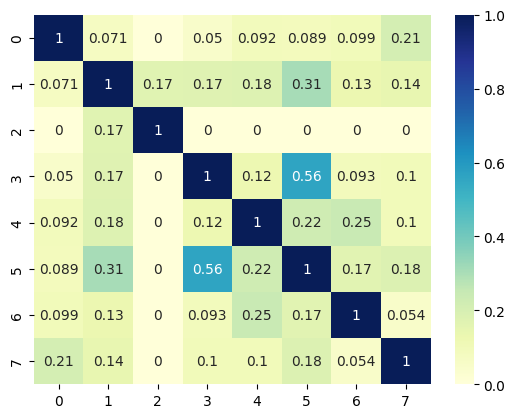

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(similarity, annot=True, cmap="YlGnBu")
plt.show()

### 3. BM25

In [13]:
from rank_bm25 import BM25Okapi

In [14]:
tokenized = [sentence.split(' ') for sentence in documents]

In [15]:
bm25 = BM25Okapi(tokenized)

In [16]:
doc_scores = bm25.get_scores(test_query.split(' '))
print(doc_scores)

[0.95551145 0.34515608 0.         1.01697187 0.42257427 1.46710696
 0.32296747 1.36631335]


In [17]:
bm25.get_top_n(test_query.split(' '), sentences,n=1)

['He slept by the bank.']

In [18]:
scores = []
for i in tokenized:
    temp = bm25.get_scores(i)
    temp /= max(temp)
    scores.append(temp)

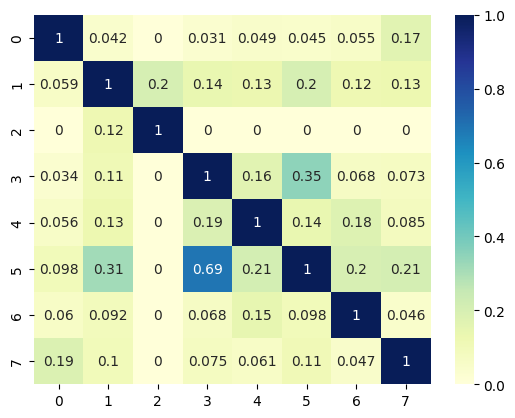

In [19]:
sns.heatmap(scores, annot=True, cmap="YlGnBu")
plt.show()

Observations :<br> 
- Similar query-result pair has higher score for BM25.
- Due to absence of semantic relations, sentences with similar gramatical arrangement (with no correlation) get higher scores.